In [43]:
import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [44]:
ml = pd.read_csv('ml.csv')
feat = ml.drop(['Unnamed: 0', 'Time Label', 'Nodes Label'], axis = 1)
feat

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,INITIAL LP,PRESOLVING TIME,vars,bin_vars,...,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
0,10teams.mps.gz,2,11.088517,30,12.212530,276,20.0,0.062201,7.613325,0.888889,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
1,10teams.mps.gz,4,11.186637,30,12.444448,276,20.0,0.060087,7.613325,0.888889,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
2,10teams.mps.gz,8,11.044666,30,12.331489,276,20.0,0.058780,7.613325,0.888889,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
3,10teams.mps.gz,16,10.835616,30,12.467186,276,20.0,0.059116,7.613325,0.888889,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
4,10teams.mps.gz,32,10.833424,30,12.477946,276,20.0,0.058801,7.613325,0.888889,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,-24.0,1.552340,8.119994,0.999702,...,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2126,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,-24.0,1.914422,8.119994,0.999702,...,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2127,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,-24.0,1.507830,8.119994,0.999702,...,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2128,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,-24.0,1.547767,8.119994,0.999702,...,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025


In [45]:
feat = feat.groupby('NAME').mean()
feat = feat.reset_index()
feat

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,INITIAL LP,PRESOLVING TIME,vars,bin_vars,...,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
0,10teams.mps.gz,12.4,10.997772,30.0,12.386720,276.0,2.000000e+01,0.059797,7.613325,0.888889,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.000000,7.377759,0.000000,5.347108
1,22433.mps.gz,12.4,2.535930,1.0,0.650582,5.0,2.124053e+04,0.025466,6.061457,0.538462,...,0.0,0.0,0.0,1.000000,0.040121,0.00000,0.015269,6.061457,0.000000,5.288267
2,23588.mps.gz,12.4,5.527370,576.0,2.399748,981.0,7.649866e+03,0.031946,5.908083,0.627717,...,0.0,0.0,0.0,1.000000,0.073409,0.00000,0.026683,5.908083,0.000000,4.919981
3,30_70_45_05_100.mps.gz,12.4,282.653795,46.0,240.079782,201.0,-5.336000e+03,1.625184,9.284705,0.999907,...,0.0,0.0,0.0,0.149627,0.000354,3.72884,0.000000,9.284334,0.000000,9.396654
4,30_70_45_095_100.mps.gz,12.4,743.997969,201.0,55.714462,1.0,-6.132000e+03,2.143665,9.303466,0.999909,...,0.0,0.0,0.0,0.164139,0.000339,3.78902,0.000000,9.303375,0.000000,9.435562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,uct-subprob.mps.gz,12.4,3212.414116,75300.0,18000.010096,2159025.8,-2.000000e+00,0.167001,7.721349,0.167996,...,0.0,0.0,0.0,0.874303,0.002280,0.90309,0.000000,7.703459,0.000000,7.541683
422,umts.mps.gz,12.4,1079.840992,144227.0,11604.852368,3106370.0,1.460426e+06,0.230250,7.988543,0.950797,...,0.0,0.0,0.0,0.012094,0.001738,6.14613,0.027856,7.411556,0.039879,7.541152
423,unitcal_7.mps.gz,12.4,940.799926,705.0,10563.733016,196989.0,1.028415e+06,6.065447,10.156384,0.110891,...,0.0,0.0,0.0,0.356669,0.000101,4.30103,0.795567,10.083139,0.000000,10.642349
424,var-smallemery-m6j6.mps.gz,12.4,7171.038360,685889.0,10246.224785,836578.0,-1.697219e+03,8.342061,8.631949,0.999643,...,0.0,0.0,0.0,0.011181,0.011306,0.00000,0.039372,8.113127,0.000000,9.259321


In [46]:
time_label = []
nodes_label = []
for index, row in feat.iterrows():
    if row['TIME W/ CUTS'] > row['TIME W/O CUTS']:
        time_label.append(-1)
    elif row['TIME W/ CUTS'] <= row['TIME W/O CUTS']:
        time_label.append(1)

    if row['NODES W/ CUTS'] > row['NODES W/O CUTS']:
        nodes_label.append(-1)
    elif row['NODES W/ CUTS'] <= row['NODES W/O CUTS']:
        nodes_label.append(1)
    
feat['Time Label'] = time_label
feat['Nodes Label'] = nodes_label

# feat.to_csv('ml.csv')
feat

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,INITIAL LP,PRESOLVING TIME,vars,bin_vars,...,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr,Time Label,Nodes Label
0,10teams.mps.gz,12.4,10.997772,30.0,12.386720,276.0,2.000000e+01,0.059797,7.613325,0.888889,...,0.0,0.478261,0.026087,1.63347,0.000000,7.377759,0.000000,5.347108,1,1
1,22433.mps.gz,12.4,2.535930,1.0,0.650582,5.0,2.124053e+04,0.025466,6.061457,0.538462,...,0.0,1.000000,0.040121,0.00000,0.015269,6.061457,0.000000,5.288267,-1,1
2,23588.mps.gz,12.4,5.527370,576.0,2.399748,981.0,7.649866e+03,0.031946,5.908083,0.627717,...,0.0,1.000000,0.073409,0.00000,0.026683,5.908083,0.000000,4.919981,-1,1
3,30_70_45_05_100.mps.gz,12.4,282.653795,46.0,240.079782,201.0,-5.336000e+03,1.625184,9.284705,0.999907,...,0.0,0.149627,0.000354,3.72884,0.000000,9.284334,0.000000,9.396654,-1,1
4,30_70_45_095_100.mps.gz,12.4,743.997969,201.0,55.714462,1.0,-6.132000e+03,2.143665,9.303466,0.999909,...,0.0,0.164139,0.000339,3.78902,0.000000,9.303375,0.000000,9.435562,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,uct-subprob.mps.gz,12.4,3212.414116,75300.0,18000.010096,2159025.8,-2.000000e+00,0.167001,7.721349,0.167996,...,0.0,0.874303,0.002280,0.90309,0.000000,7.703459,0.000000,7.541683,1,1
422,umts.mps.gz,12.4,1079.840992,144227.0,11604.852368,3106370.0,1.460426e+06,0.230250,7.988543,0.950797,...,0.0,0.012094,0.001738,6.14613,0.027856,7.411556,0.039879,7.541152,1,1
423,unitcal_7.mps.gz,12.4,940.799926,705.0,10563.733016,196989.0,1.028415e+06,6.065447,10.156384,0.110891,...,0.0,0.356669,0.000101,4.30103,0.795567,10.083139,0.000000,10.642349,1,1
424,var-smallemery-m6j6.mps.gz,12.4,7171.038360,685889.0,10246.224785,836578.0,-1.697219e+03,8.342061,8.631949,0.999643,...,0.0,0.011181,0.011306,0.00000,0.039372,8.113127,0.000000,9.259321,1,1


In [49]:
X = feat.iloc[0:, 0:-2]
# X = X.astype(np.float64)
y = feat.iloc[0:, -2]
# y = y.astype(np.float64)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'NODES W/ CUTS', 
                        'TIME W/O CUTS', 'NODES W/O CUTS' ], axis = 1)
cols = X_train.copy()
X_test = X_test.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'NODES W/ CUTS', 
                      'TIME W/O CUTS', 'NODES W/O CUTS'], axis = 1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
cols

(340, 22) (340,)
(86, 22) (86,)


,INITIAL LP,PRESOLVING TIME,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,linsetcov_constr,...,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
255,8.877000e+03,0.017984,5.278115,0.933673,0.000000,0.066327,5.214936,0.152174,0.000000,0.000000,...,0.0,0.00000,0.000000,0.847826,0.023126,3.37675,0.971717,5.278115,0.000000,5.214936
313,-4.390700e+04,22.825316,10.053114,0.999828,0.000172,0.000000,10.743415,0.000000,0.000086,0.000000,...,0.0,0.04896,0.000000,0.497884,0.000291,3.43136,0.248909,10.048280,0.000173,10.740995
229,2.282219e-03,33.449583,11.449410,0.999361,0.000000,0.000639,12.125811,0.000336,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000623,0.000034,0.00000,1.150550,11.449410,0.000000,12.125811
5,-5.967000e+03,2.150924,9.304741,0.999909,0.000000,0.000091,9.431161,0.000000,0.000000,0.001524,...,0.0,0.00000,0.000000,0.160532,0.000338,3.77706,0.000000,9.303649,0.000000,9.430359
425,-2.400000e+01,1.619734,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.018030,0.017120,0.00000,0.000000,7.741534,0.000434,6.582025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-2.000000e+05,40.978283,10.315597,0.331126,0.000000,0.668874,10.613934,0.004914,0.000000,0.000000,...,0.0,0.00000,0.000000,0.493882,0.001717,0.00000,0.642555,10.315564,0.000000,10.328690
192,-3.689729e+08,6.946319,8.464003,0.461928,0.000000,0.538072,8.095599,0.000000,0.111280,0.000000,...,0.0,0.00000,0.000000,0.666768,0.036965,7.77789,1.758950,8.464003,0.000000,8.095599
117,2.606000e+03,0.034147,6.555357,0.250356,0.005690,0.743954,5.765191,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.987461,0.009230,0.00000,1.003350,6.481577,0.006126,5.736572
47,3.600000e+01,0.030815,5.446737,0.987069,0.004310,0.008621,4.077537,0.288136,0.000000,0.000000,...,0.0,0.00000,0.016949,0.559322,0.320500,0.00000,1.311860,5.438079,0.000000,4.060443


In [70]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
cols = cols.iloc[0:, 0:]

bestfeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(cols.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(22,'Score')) #print best features
data=featureScores.nlargest(22,'Score')

             Features     Score
16          nonzeroes  5.778152
17            obj_dyn  3.127678
18      dynamism_mean  2.196243
1     PRESOLVING TIME  1.789764
0          INITIAL LP  1.205755
11   lineqknap_constr  1.175081
7   linsetpart_constr  1.128695
20    presol_int_vars  0.991212
10     lincard_constr  0.877595
12  linbinpack_constr  0.785687
14  linintknap_constr  0.707844
15   linmixbin_constr  0.493689
9    linsetcov_constr  0.241341
4            int_vars  0.206918
8   linsetpack_constr  0.178138
19        presol_vars  0.164928
6              constr  0.152743
2                vars  0.127747
13    linknaps_constr  0.110890
21      presol_constr  0.086351
5           cont_vars  0.037876
3            bin_vars  0.029993


<AxesSubplot:ylabel='Features'>

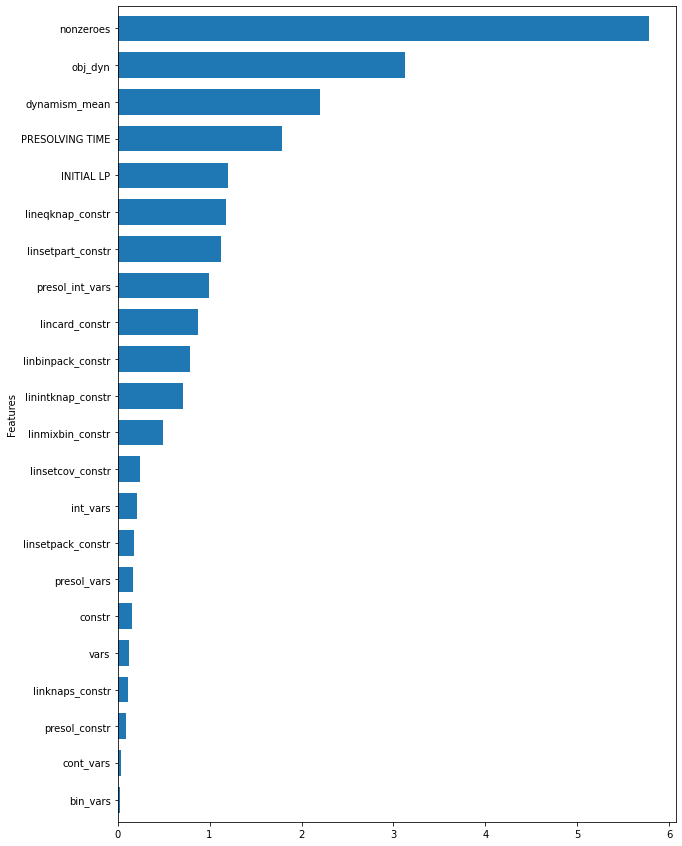

In [72]:
features = data.copy().set_index('Features') 
features = features.iloc[::-1]
features.plot.barh(width = 0.7, figsize=(10,15), legend=None)

In [73]:
X = feat.drop(['Time Label','Nodes Label', 'bin_vars', 'cont_vars',
              'presol_constr', 'linknaps_constr', 'vars', 'constr',
              'presol_vars'], axis = 1)

y = feat.iloc[0:, -2]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

test_df = X_test.copy()
train_df = X_train.copy()

X_train = X_train.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'NODES W/ CUTS', 
                        'TIME W/O CUTS', 'NODES W/O CUTS'], axis = 1)
X_test = X_test.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'NODES W/ CUTS', 
                        'TIME W/O CUTS', 'NODES W/O CUTS'], axis = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
test_df

(340, 15) (340,)
(86, 15) (86,)


,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,INITIAL LP,PRESOLVING TIME,int_vars,linsetpart_constr,...,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_int_vars
274,neos-780889.mps.gz,12.4,176.675456,1.0,366.928362,1.0,-1.545922e+07,76.790793,0.000000,0.007834,...,0.000000,0.627533,0.0,0.000000,0.0,0.004735,0.000037,1.34423,0.002259,0.000000
159,mzzv11.mps.gz,12.4,422.340278,1356.0,1489.909837,8880.0,-2.599800e+04,19.519242,0.024512,0.112959,...,0.002948,0.232446,0.0,0.000000,0.0,0.000105,0.001384,2.39794,0.054545,0.019336
54,chromaticindex32-8.mps.gz,12.4,1.025220,1.0,3.402795,249.0,3.000000e+00,0.062859,0.000000,0.272383,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.001734,0.00000,0.000000,0.000000
309,neos22.mps.gz,12.4,1.452381,1.0,18000.109330,4782054.0,-1.056000e+06,0.234904,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.253456,0.000730,3.18709,0.933821,0.000000
10,ab67-40-100.mps.gz,12.4,300.208641,73.0,316.162226,75.0,-4.706400e+12,5.875944,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000490,4.88588,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,mik-250-20-75-2.mps.gz,12.4,12.884775,427.0,24.745723,90650.0,-2.069740e+05,0.043530,0.648148,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.176068,2.54382,1.262980,0.574074
4,30_70_45_095_100.mps.gz,12.4,743.997969,201.0,55.714462,1.0,-6.132000e+03,2.143665,0.000000,0.000000,...,0.001437,0.000000,0.0,0.000000,0.0,0.164139,0.000339,3.78902,0.000000,0.000000
225,neos-4322846-ryton.mps.gz,12.4,818.066564,664.0,670.952097,522.0,4.198484e-01,92.231158,0.000000,0.001496,...,0.000000,0.005297,0.0,0.001381,0.0,0.001400,0.000040,0.00000,0.002117,0.000000
367,ran14x18-disj-8.mps.gz,12.4,1658.803667,312024.0,16537.715878,14591597.0,3.444421e+03,0.091920,0.000000,0.000000,...,0.109620,0.000000,0.0,0.000000,0.0,0.326622,0.045617,2.42160,1.098130,0.000000


In [77]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

255    1
313    1
229   -1
5     -1
425    1
      ..
323   -1
192    1
117    1
47    -1
172    1
Name: Time Label, Length: 340, dtype: int64

In [78]:
model_params={'svm':{'model': SVC(kernel = 'rbf', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]
                             }
                    },
              'rfm':{'model': RandomForestClassifier(random_state = 0), 
                    'params':{'n_estimators':[100, 200, 500], 
                             'max_depth':[5, 10, 15]
                             }
                    },
              'lrm':{'model': LogisticRegression(solver='lbfgs', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 
                              'max_iter':[100, 500, 1000]
                             }
                    },
              'et':{'model': ExtraTreesClassifier(random_state=0), 
                    'params':{'n_estimators': [100, 200, 500], 
                              'max_depth': [5, 10, 15]
                             }
                    },
              'nn':{'model': MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', 
                                           power_t=0.5, max_iter=500, shuffle=True, tol=0.00001, verbose=True, 
                                           early_stopping=False, validation_fraction=0.1, random_state=0),
                    'params':{'hidden_layer_sizes': [(5, ), (10, ), (15, )],
                                 'learning_rate_init': [1e-1, 1e-2, 1e-3],
                                 'alpha':  [1e-2, 1e-3, 1e-4],
                                 'activation': ['tanh', 'relu', 'logistic']
                             }
                    }
             }
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv = None, return_train_score = False, n_jobs = -1)
    clf.fit(X_train, y_train)
    scores.append({'model': model_name, 'best_score':clf.best_score_, 'best_params':clf.best_params_})

C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [79]:
scores=pd.DataFrame(scores).sort_values(by = ['best_score'], ascending = False)
scores.to_csv('scores.csv')

In [80]:
scores = OrderedDict()
target_names = ['-1', '1']

print('SUPPORT VECTOR MACHINES')
clf = SVC(random_state = 0, C = 100, gamma = 0.001, kernel = 'rbf')
clf.fit(X_train, y_train)
y_train_pred_svm = clf.predict(X_train)
y_test_pred_svm = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_svm)
mse_test = mean_squared_error(y_test, y_test_pred_svm)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_svm, target_names=target_names))
scores['SVC'] = [score, metrics.precision_score(y_test, y_test_pred_svm), metrics.recall_score(y_test, y_test_pred_svm),
                      metrics.f1_score(y_test, y_test_pred_svm), mse_test, mse_train]

print('##################################')
print('NEURAL NETWORKS')
clf = MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', power_t=0.5, max_iter=500, 
                    shuffle=True, tol=0.00001, verbose=True, 
                    early_stopping=False, validation_fraction=0.1,
                    hidden_layer_sizes=(10, ), activation='tanh', alpha=0.0001, 
                    learning_rate_init=0.1, random_state=0)
clf.fit(X_train, y_train)
y_train_pred_nn = clf.predict(X_train)
y_test_pred_nn = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_nn)
mse_test = mean_squared_error(y_test, y_test_pred_nn)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_nn, target_names=target_names))
scores['NN'] = [score, metrics.precision_score(y_test, y_test_pred_nn), metrics.recall_score(y_test, y_test_pred_nn),
                      metrics.f1_score(y_test, y_test_pred_nn), mse_test, mse_train]

print('##################################')
print('DECISION TREES')
clf = ExtraTreesClassifier(random_state=0, max_depth = 15, n_estimators = 100)
clf.fit(X_train, y_train)
y_train_pred_et = clf.predict(X_train)
y_test_pred_et = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_et, target_names=target_names))
scores['ET'] = [score, metrics.precision_score(y_test, y_test_pred_et), 
                         metrics.recall_score(y_test, y_test_pred_et), 
                         metrics.f1_score(y_test, y_test_pred_et), mse_test, mse_train]

print('##################################')
print('LOGISTIC REGRESSION')
clf = LogisticRegression(solver='lbfgs', random_state = 0, C = 1000, max_iter = 100)
clf.fit(X_train, y_train)
y_train_pred_lr = clf.predict(X_train)
y_test_pred_lr = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))
scores['LR'] = [score, metrics.precision_score(y_test, y_test_pred_lr), metrics.recall_score(y_test, y_test_pred_lr),
                      metrics.f1_score(y_test, y_test_pred_lr), mse_test, mse_train]

print('##################################')
print('RANDOM FOREST')
clf = RandomForestClassifier(random_state = 0, max_depth = 15, n_estimators = 500)
clf.fit(X_train, y_train)
y_train_pred_rf = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))
scores['RF'] = [score, metrics.precision_score(y_test, y_test_pred_rf), metrics.recall_score(y_test, y_test_pred_rf),
                      metrics.f1_score(y_test, y_test_pred_rf), mse_test, mse_train]

SUPPORT VECTOR MACHINES
MSE Test: 1.9069767441860466, MSE Train: 1.6470588235294117
Accuracy score: 0.5232558139534884

              precision    recall  f1-score   support

          -1       0.33      0.05      0.09        39
           1       0.54      0.91      0.68        47

    accuracy                           0.52        86
   macro avg       0.44      0.48      0.38        86
weighted avg       0.44      0.52      0.41        86

##################################
NEURAL NETWORKS


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MSE Test: 1.813953488372093, MSE Train: 0.23529411764705882
Accuracy score: 0.5465116279069767

              precision    recall  f1-score   support

          -1       0.50      0.51      0.51        39
           1       0.59      0.57      0.58        47

    accuracy                           0.55        86
   macro avg       0.54      0.54      0.54        86
weighted avg       0.55      0.55      0.55        86

##################################
DECISION TREES
MSE Test: 1.813953488372093, MSE Train: 0.3058823529411765
Accuracy score: 0.5465116279069767

              precision    recall  f1-score   support

          -1       0.50      0.33      0.40        39
           1       0.57      0.72      0.64        47

    accuracy                           0.55        86
   macro avg       0.53      0.53      0.52        86
weighted avg       0.54      0.55      0.53        86

##################################
LOGISTIC REGRESSION
MSE Test: 1.6744186046511629, MSE Train: 1.5764705

In [81]:
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.columns=['accuracy', 'precision', 'recall', 'f1-score', 'mse test', 'mse train']
scores_df

,accuracy,precision,recall,f1-score,mse test,mse train
SVC,0.523256,0.537500,0.914894,0.677165,1.906977,1.647059
NN,0.546512,0.586957,0.574468,0.580645,1.813953,0.235294
ET,0.546512,0.566667,0.723404,0.635514,1.813953,0.305882
LR,0.581395,0.575342,0.893617,0.700000,1.674419,1.576471
RF,0.616279,0.640000,0.680851,0.659794,1.534884,0.000000


Text(0.5, 1.0, 'MSE')

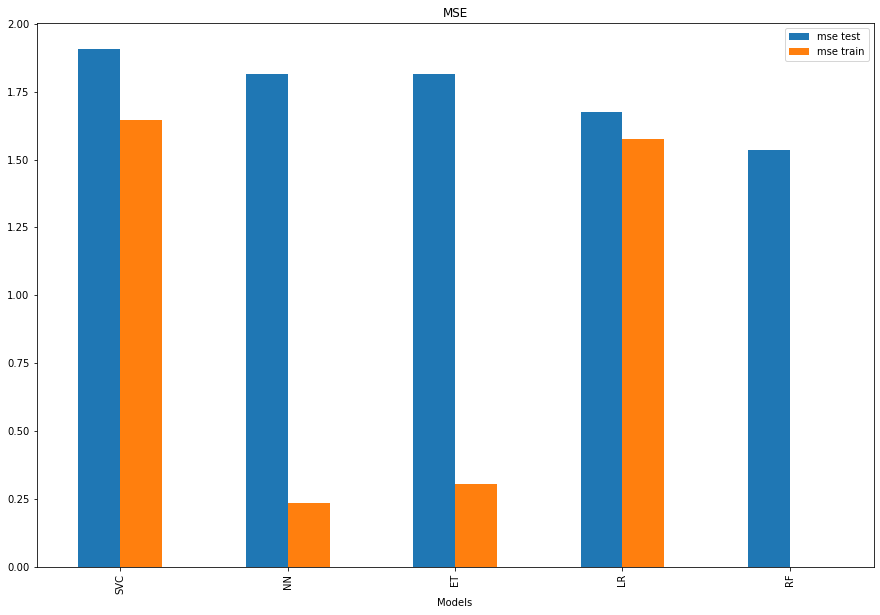

In [82]:
errors_df = scores_df.filter(['mse test', 'mse train'])
errors_df.plot.bar(width = 0.5, figsize=(15,10))
plt.xlabel("Models")
plt.title('MSE')

Text(0.5, 1.0, 'Accuracy Score')

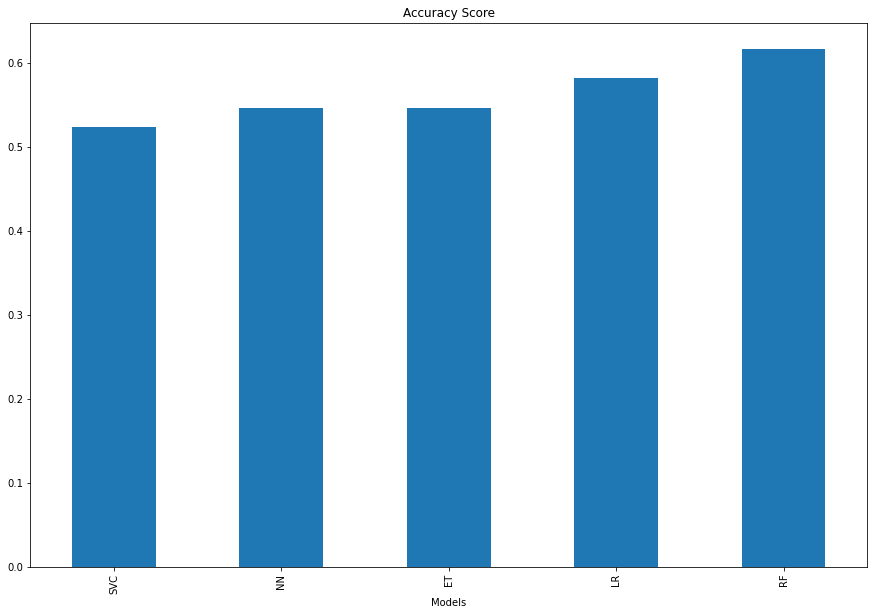

In [83]:
accuracy_df = scores_df.filter(['accuracy'])
accuracy_df.plot.bar(width = 0.5, figsize=(15,10), legend = None)
plt.xlabel("Models")
plt.title('Accuracy Score')

ANALYSIS ON TEST DATA

In [118]:
test_df['PLabel NN'] = y_test_pred_nn
test_df['PLabel ET'] = y_test_pred_et
test_df['PLabel RF'] = y_test_pred_rf

test_feat = feat.filter(['NAME', 'Time Label'])
analysis = test_df.merge(test_feat, on = ['NAME'], how = 'left')
analysis = analysis.filter(['NAME', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

,NAME,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes
0,neos-780889.mps.gz,176.675456,366.928362,1.0,1.0,1,1,1,1,176.675456,1.0
1,mzzv11.mps.gz,422.340278,1489.909837,1356.0,8880.0,1,1,1,1,422.340278,1356.0
2,chromaticindex32-8.mps.gz,1.025220,3.402795,1.0,249.0,1,1,-1,1,1.025220,1.0
3,neos22.mps.gz,1.452381,18000.109330,1.0,4782054.0,1,1,1,1,1.452381,1.0
4,ab67-40-100.mps.gz,300.208641,316.162226,73.0,75.0,1,1,1,1,300.208641,73.0
...,...,...,...,...,...,...,...,...,...,...,...
81,mik-250-20-75-2.mps.gz,12.884775,24.745723,427.0,90650.0,-1,1,1,1,12.884775,427.0
82,30_70_45_095_100.mps.gz,743.997969,55.714462,201.0,1.0,-1,1,-1,-1,55.714462,1.0
83,neos-4322846-ryton.mps.gz,818.066564,670.952097,664.0,522.0,1,1,-1,-1,670.952097,522.0
84,ran14x18-disj-8.mps.gz,1658.803667,16537.715878,312024.0,14591597.0,1,1,1,1,1658.803667,312024.0


In [106]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

,NAME,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Minimum Time,Minimum Nodes,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
0,neos-780889.mps.gz,176.675456,366.928362,1.0,1.0,1,1,1,176.675456,1.0,176.675456,176.675456,176.675456,1.0,1.0,1.0
1,mzzv11.mps.gz,422.340278,1489.909837,1356.0,8880.0,1,1,1,422.340278,1356.0,422.340278,422.340278,422.340278,1356.0,1356.0,1356.0
2,chromaticindex32-8.mps.gz,1.025220,3.402795,1.0,249.0,1,1,-1,1.025220,1.0,3.402795,1.025220,1.025220,249.0,1.0,1.0
3,neos22.mps.gz,1.452381,18000.109330,1.0,4782054.0,1,1,1,1.452381,1.0,1.452381,1.452381,1.452381,1.0,1.0,1.0
4,ab67-40-100.mps.gz,300.208641,316.162226,73.0,75.0,1,1,1,300.208641,73.0,300.208641,300.208641,300.208641,73.0,73.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,mik-250-20-75-2.mps.gz,12.884775,24.745723,427.0,90650.0,-1,1,1,12.884775,427.0,12.884775,24.745723,12.884775,427.0,90650.0,427.0
82,30_70_45_095_100.mps.gz,743.997969,55.714462,201.0,1.0,-1,1,-1,55.714462,1.0,55.714462,55.714462,743.997969,1.0,1.0,201.0
83,neos-4322846-ryton.mps.gz,818.066564,670.952097,664.0,522.0,1,1,-1,670.952097,522.0,670.952097,818.066564,818.066564,522.0,664.0,664.0
84,ran14x18-disj-8.mps.gz,1658.803667,16537.715878,312024.0,14591597.0,1,1,1,1658.803667,312024.0,1658.803667,1658.803667,1658.803667,312024.0,312024.0,312024.0


In [107]:
testing = analysis.copy()

In [108]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [109]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [110]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [111]:
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [112]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                           Time                             \
Setting                              Cut        No Cut      Perfect   
Metric         Bucket                                                 
Geometric Mean [0,18000)      319.066487    438.335625   227.926385   
               [10,18000)     668.496297    885.915567   444.030573   
               [100,18000)   1635.239844   1700.839647  1038.584469   
               [1000,18000)  7372.482963   5590.205259  3935.765216   
               [3600,18000)  9273.146949  11519.085614  7688.686154   

Parameter                                                            \
Setting                               RF           ET            NN   
Metric         Bucket                                                 
Geometric Mean [0,18000)      332.147777   367.460550    328.677605   
               [10,18000)     705.081830   800.639665    697.713635   
               [100,18000)   1463.647334  1665.484437   1433.446023   
               [1000,18000)  6186.364996  6253.109862   5195.126200   
               [3600,18000)  8674.911429  8862.580687  12328.511889   

Parameter                             Node                                \
Setting                                Cut         No Cut        Perfect   
Metric         Bucket                                                      
Geometric Mean [0,18000)       6490.303382   18481.916810    5701.479095   
               [10,18000)     13336.715273   39828.740403   11324.046990   
               [100,18000)    25332.878728   45977.245793   20701.308464   
               [1000,18000)  332913.273432  439692.731118  219698.823680   
               [3600,18000)  530800.984581  819106.252775  482884.718216   

Parameter                                                                 \
Setting                                 RF             ET             NN   
Metric         Bucket                                                      
Geometric Mean [0,18000)       8712.611410    8452.130512    8778.669868   
               [10,18000)     19328.039847   18619.134800   19482.507118   
               [100,18000)    28002.855999   26106.437828   25535.483017   
               [1000,18000)  360309.847145  316881.792337  281725.827133   
               [3600,18000)  646928.277282  500531.995446  689073.279678   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)           86  
               [10,18000)          63  
               [100,18000)         42  
               [1000,18000)        18  
               [3600,18000)         9

In [113]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [114]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

# imp_time    
# imp_nodes

In [115]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes

avg_bb_df

Parameter                           Time                             \
Setting                              Cut        No Cut      Perfect   
Metric         Bucket                                                 
Geometric Mean [0,18000)      319.066487    438.335625   227.926385   
               [10,18000)     668.496297    885.915567   444.030573   
               [100,18000)   1635.239844   1700.839647  1038.584469   
               [1000,18000)  7372.482963   5590.205259  3935.765216   
               [3600,18000)  9273.146949  11519.085614  7688.686154   

Parameter                                                            \
Setting                               RF           ET            NN   
Metric         Bucket                                                 
Geometric Mean [0,18000)      332.147777   367.460550    328.677605   
               [10,18000)     705.081830   800.639665    697.713635   
               [100,18000)   1463.647334  1665.484437   1433.446023   
               [1000,18000)  6186.364996  6253.109862   5195.126200   
               [3600,18000)  8674.911429  8862.580687  12328.511889   

Parameter                             Node                                \
Setting                                Cut         No Cut        Perfect   
Metric         Bucket                                                      
Geometric Mean [0,18000)       6490.303382   18481.916810    5701.479095   
               [10,18000)     13336.715273   39828.740403   11324.046990   
               [100,18000)    25332.878728   45977.245793   20701.308464   
               [1000,18000)  332913.273432  439692.731118  219698.823680   
               [3600,18000)  530800.984581  819106.252775  482884.718216   

Parameter                                                                 \
Setting                                 RF             ET             NN   
Metric         Bucket                                                      
Geometric Mean [0,18000)       8712.611410    8452.130512    8778.669868   
               [10,18000)     19328.039847   18619.134800   19482.507118   
               [100,18000)    28002.855999   26106.437828   25535.483017   
               [1000,18000)  360309.847145  316881.792337  281725.827133   
               [3600,18000)  646928.277282  500531.995446  689073.279678   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)           86        3.012262  30.227048  
               [10,18000)          63        4.370606  39.608100  
               [100,18000)         42      -12.340320   0.799768  
               [1000,18000)        18      -29.533561 -15.375610  
               [3600,18000)         9       -6.451268  -5.702512

ANALYSIS ON TRAINING DATA

In [117]:
train_df

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,INITIAL LP,PRESOLVING TIME,int_vars,linsetpart_constr,...,linbinpack_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_int_vars,PLabel NN,PLabel ET,PLabel RF
255,neos-5140963-mincio.mps.gz,12.4,16296.812996,5624805.0,17910.818276,5527433.2,8.877000e+03,0.017984,0.000000,0.152174,...,0.0,0.000000,0.847826,0.023126,3.37675,0.971717,0.000000,1,1,1
313,neos8.mps.gz,12.4,16.780323,1.0,56.483545,1.0,-4.390700e+04,22.825316,0.000172,0.000000,...,0.0,0.000000,0.497884,0.000291,3.43136,0.248909,0.000173,1,1,1
229,neos-4391920-timok.mps.gz,12.4,299.384161,1.0,290.133364,1.0,2.282219e-03,33.449583,0.000000,0.000336,...,0.0,0.000000,0.000623,0.000034,0.00000,1.150550,0.000000,-1,-1,-1
5,30_70_45_095_98.mps.gz,12.4,76.557754,1.0,26.326404,1.0,-5.967000e+03,2.150924,0.000000,0.000000,...,0.0,0.000000,0.160532,0.000338,3.77706,0.000000,0.000000,-1,1,-1
425,wachplan.mps.gz,12.4,1434.605408,67520.0,1776.538785,98056.0,-2.400000e+01,1.619734,0.000298,0.000000,...,0.0,0.000000,0.018030,0.017120,0.00000,0.000000,0.000434,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,ns1644855.mps.gz,12.4,860.987882,1.0,853.974045,1.0,-2.000000e+05,40.978283,0.000000,0.004914,...,0.0,0.000000,0.493882,0.001717,0.00000,0.642555,0.000000,-1,-1,-1
192,neos-3065804-namu.mps.gz,12.4,11.837614,1.0,11.855551,1.0,-3.689729e+08,6.946319,0.000000,0.000000,...,0.0,0.000000,0.666768,0.036965,7.77789,1.758950,0.000000,1,1,1
117,ic97_tension.mps.gz,12.4,20.023839,22278.0,31.999309,83938.0,2.606000e+03,0.034147,0.005690,0.000000,...,0.0,0.000000,0.987461,0.009230,0.00000,1.003350,0.006126,1,1,1
47,bppc8-02.mps.gz,12.4,0.677820,125.0,0.117125,177.0,3.600000e+01,0.030815,0.004310,0.288136,...,0.0,0.016949,0.559322,0.320500,0.00000,1.311860,0.000000,-1,-1,-1


In [119]:
train_df['PLabel NN'] = y_train_pred_nn
train_df['PLabel ET'] = y_train_pred_et
train_df['PLabel RF'] = y_train_pred_rf
train_feat = feat.filter(['NAME', 'Time Label'])
analysis = train_df.merge(train_feat, on = ['NAME'], how = 'left')
analysis = analysis.filter(['NAME', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

,NAME,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes
0,neos-5140963-mincio.mps.gz,16296.812996,17910.818276,5624805.0,5527433.2,1,1,1,1,16296.812996,5527433.2
1,neos8.mps.gz,16.780323,56.483545,1.0,1.0,1,1,1,1,16.780323,1.0
2,neos-4391920-timok.mps.gz,299.384161,290.133364,1.0,1.0,-1,-1,-1,-1,290.133364,1.0
3,30_70_45_095_98.mps.gz,76.557754,26.326404,1.0,1.0,-1,1,-1,-1,26.326404,1.0
4,wachplan.mps.gz,1434.605408,1776.538785,67520.0,98056.0,1,1,1,1,1434.605408,67520.0
...,...,...,...,...,...,...,...,...,...,...,...
335,ns1644855.mps.gz,860.987882,853.974045,1.0,1.0,-1,-1,-1,-1,853.974045,1.0
336,neos-3065804-namu.mps.gz,11.837614,11.855551,1.0,1.0,1,1,1,1,11.837614,1.0
337,ic97_tension.mps.gz,20.023839,31.999309,22278.0,83938.0,1,1,1,1,20.023839,22278.0
338,bppc8-02.mps.gz,0.677820,0.117125,125.0,177.0,-1,-1,-1,-1,0.117125,125.0


In [120]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

,NAME,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
0,neos-5140963-mincio.mps.gz,16296.812996,17910.818276,5624805.0,5527433.2,1,1,1,1,16296.812996,5527433.2,16296.812996,16296.812996,16296.812996,5624805.0,5624805.0,5624805.0
1,neos8.mps.gz,16.780323,56.483545,1.0,1.0,1,1,1,1,16.780323,1.0,16.780323,16.780323,16.780323,1.0,1.0,1.0
2,neos-4391920-timok.mps.gz,299.384161,290.133364,1.0,1.0,-1,-1,-1,-1,290.133364,1.0,290.133364,290.133364,290.133364,1.0,1.0,1.0
3,30_70_45_095_98.mps.gz,76.557754,26.326404,1.0,1.0,-1,1,-1,-1,26.326404,1.0,26.326404,26.326404,76.557754,1.0,1.0,1.0
4,wachplan.mps.gz,1434.605408,1776.538785,67520.0,98056.0,1,1,1,1,1434.605408,67520.0,1434.605408,1434.605408,1434.605408,67520.0,67520.0,67520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,ns1644855.mps.gz,860.987882,853.974045,1.0,1.0,-1,-1,-1,-1,853.974045,1.0,853.974045,853.974045,853.974045,1.0,1.0,1.0
336,neos-3065804-namu.mps.gz,11.837614,11.855551,1.0,1.0,1,1,1,1,11.837614,1.0,11.837614,11.837614,11.837614,1.0,1.0,1.0
337,ic97_tension.mps.gz,20.023839,31.999309,22278.0,83938.0,1,1,1,1,20.023839,22278.0,20.023839,20.023839,20.023839,22278.0,22278.0,22278.0
338,bppc8-02.mps.gz,0.677820,0.117125,125.0,177.0,-1,-1,-1,-1,0.117125,125.0,0.117125,0.117125,0.117125,177.0,177.0,177.0


In [121]:
training = analysis.copy()

In [122]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [123]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [124]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [125]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       350.004190    539.546237   282.897417   
               [10,18000)      631.220434    971.128028   493.820770   
               [100,18000)    1551.436922   2331.443814  1191.626693   
               [1000,18000)   5652.132617   7318.631937  4254.482029   
               [3600,18000)  11438.455128  13875.797663  9674.818290   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      282.897417   292.283606   290.126540   
               [10,18000)     493.820770   511.620594   506.552965   
               [100,18000)   1191.626693  1232.917477  1227.523258   
               [1000,18000)  4254.482029  4354.106591  4410.695957   
               [3600,18000)  9674.818290  9810.546296  9899.351365   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4096.962302   13334.591257   3569.851283   
               [10,18000)     6867.917243   21951.217580   5844.601428   
               [100,18000)   12565.027367   37605.865444  10584.496973   
               [1000,18000)  32501.201185   88242.094632  26435.225324   
               [3600,18000)  47490.851527  123838.557457  37048.522613   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4188.420828   4223.324792   4330.586095   
               [10,18000)     6958.230431   7059.867466   7210.628921   
               [100,18000)   13194.240617  13357.026820  13746.600140   
               [1000,18000)  35430.199817  34704.475646  38075.023887   
               [3600,18000)  61424.233766  61542.113801  65360.727135   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          340  
               [10,18000)         265  
               [100,18000)        181  
               [1000,18000)        89  
               [3600,18000)        46

In [126]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [127]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

# imp_time    
# imp_nodes

In [128]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       350.004190    539.546237   282.897417   
               [10,18000)      631.220434    971.128028   493.820770   
               [100,18000)    1551.436922   2331.443814  1191.626693   
               [1000,18000)   5652.132617   7318.631937  4254.482029   
               [3600,18000)  11438.455128  13875.797663  9674.818290   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      282.897417   292.283606   290.126540   
               [10,18000)     493.820770   511.620594   506.552965   
               [100,18000)   1191.626693  1232.917477  1227.523258   
               [1000,18000)  4254.482029  4354.106591  4410.695957   
               [3600,18000)  9674.818290  9810.546296  9899.351365   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4096.962302   13334.591257   3569.851283   
               [10,18000)     6867.917243   21951.217580   5844.601428   
               [100,18000)   12565.027367   37605.865444  10584.496973   
               [1000,18000)  32501.201185   88242.094632  26435.225324   
               [3600,18000)  47490.851527  123838.557457  37048.522613   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4188.420828   4223.324792   4330.586095   
               [10,18000)     6958.230431   7059.867466   7210.628921   
               [100,18000)   13194.240617  13357.026820  13746.600140   
               [1000,18000)  35430.199817  34704.475646  38075.023887   
               [3600,18000)  61424.233766  61542.113801  65360.727135   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)          340      -19.173134   2.232350  
               [10,18000)         265      -21.767303   1.315001  
               [100,18000)        181      -23.192063   5.007655  
               [1000,18000)        89      -24.727845   6.779055  
               [3600,18000)        46      -15.418488  29.339087

In [129]:
df = [training, testing]

t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [130]:
train_test_classes = ['Geometric Mean']
train_test_sets = ['Train Set', 'Test Set']

In [131]:
train_test_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

train_test_row_names = pd.MultiIndex.from_product(
    [train_test_classes, train_test_sets],
    names=['Metric', 'Set'])

train_test_df = pd.DataFrame(
    index = train_test_row_names,
    dtype = float)

train_test_df = pd.DataFrame(
    columns = train_test_cols,
    index = train_test_row_names,
    dtype = float)

In [132]:
train_test_df['Instances'] = instances

train_test_df[('Time', 'Cut')] = t_cuts

train_test_df[('Time', 'RF')] = t_rf
train_test_df[('Time', 'ET')] = t_et
train_test_df[('Time', 'NN')] = t_nn

train_test_df[('Time', 'Perfect')] = t_perfect

train_test_df[('Node', 'Cut')] = n_cuts

train_test_df[('Node', 'RF')] = n_rf
train_test_df[('Node', 'ET')] = n_et
train_test_df[('Node', 'NN')] = n_nn

train_test_df[('Node', 'Perfect')] = n_perfect

train_test_df

Parameter                       Time                                      \
Setting                          Cut     Perfect          RF          ET   
Metric         Set                                                         
Geometric Mean Train Set  350.004190  282.897417  282.897417  292.283606   
               Test Set   319.066487  227.926385  332.147777  367.460550   

Parameter                                    Node                            \
Setting                           NN          Cut      Perfect           RF   
Metric         Set                                                            
Geometric Mean Train Set  290.126540  4096.962302  3569.851283  4188.420828   
               Test Set   328.677605  6490.303382  5701.479095  8712.611410   

Parameter                                          Instances  
Setting                            ET           NN            
Metric         Set                                            
Geometric Mean Train Set  4223.324792  4330.586095       340  
               Test Set   8452.130512  8778.669868        86

In [133]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [134]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

In [135]:
train_test_df[('Improvement (%)', 'Time')] = imp_time
train_test_df[('Improvement (%)', 'Nodes')] = imp_nodes

train_test_df

Parameter                       Time                                      \
Setting                          Cut     Perfect          RF          ET   
Metric         Set                                                         
Geometric Mean Train Set  350.004190  282.897417  282.897417  292.283606   
               Test Set   319.066487  227.926385  332.147777  367.460550   

Parameter                                    Node                            \
Setting                           NN          Cut      Perfect           RF   
Metric         Set                                                            
Geometric Mean Train Set  290.126540  4096.962302  3569.851283  4188.420828   
               Test Set   328.677605  6490.303382  5701.479095  8712.611410   

Parameter                                          Instances Improvement (%)  \
Setting                            ET           NN                      Time   
Metric         Set                                                             
Geometric Mean Train Set  4223.324792  4330.586095       340      -19.173134   
               Test Set   8452.130512  8778.669868        86        3.012262   

Parameter                            
Setting                       Nodes  
Metric         Set                   
Geometric Mean Train Set   2.232350  
               Test Set   30.227048